<a href="https://colab.research.google.com/github/brotheramin/MachineLearning/blob/main/SepsisMiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# data manipulation libraries
import numpy as np # linear algebra
import pandas as pd # data processing

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning methods
from sklearn.model_selection import train_test_split # data splitting into train and test
from sklearn.preprocessing import FunctionTransformer


from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score

In [24]:
df = pd.read_csv('feature_combined.csv')

In [ ]:
df.head().T

,0,1,2,3,4
X_0,1.500000,2.227147,4.000000,0.000000,4.000000
X_1,140.000000,140.000000,140.000000,138.000000,140.000000
X_2,138.000000,138.250000,138.500000,138.000000,138.500000
X_3,137.000000,137.000000,138.000000,138.000000,138.000000
X_4,1.414214,1.129338,2.000000,0.000000,2.000000
...,...,...,...,...,...
X_103,0.015385,0.006593,-0.001099,-0.027473,-0.037363
X_104,0.650444,0.650444,0.776250,1.235168,1.281025
offset,-660.000000,-655.000000,-650.000000,-645.000000,-640.000000
id,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Columns: 108 entries, X_0 to label
dtypes: float64(93), int64(15)
memory usage: 65.8 MB


In [ ]:
df.nunique()

X_0       1372
X_1        137
X_2        513
X_3        135
X_4       1841
          ... 
X_103     1147
X_104     4182
offset     133
id         600
label        2
Length: 108, dtype: int64

In [ ]:
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
X_0,79800.0,0.155129,3.047073,-6.000000,-1.289256,0.00000,2.602498,4.000000
X_1,79800.0,89.397506,20.258613,0.000000,75.000000,88.00000,102.000000,177.000000
X_2,79800.0,87.264355,19.951703,0.000000,72.750000,85.50000,99.750000,177.000000
X_3,79800.0,85.344023,19.978456,0.000000,71.000000,84.00000,98.000000,177.000000
X_4,79800.0,0.145070,1.102048,-2.000000,-0.228728,0.00000,0.854563,2.000000
...,...,...,...,...,...,...,...,...
X_103,79800.0,0.000516,0.100430,-2.241758,-0.029670,0.00000,0.030769,2.209890
X_104,79800.0,2.405792,2.542446,0.000000,1.068188,1.83275,3.004270,50.647474
offset,79800.0,-330.000000,191.964741,-660.000000,-495.000000,-330.00000,-165.000000,0.000000
id,79800.0,300.500000,173.205925,1.000000,150.750000,300.50000,450.250000,600.000000


In [ ]:
df["label"].value_counts()

1    39900
0    39900
Name: label, dtype: int64

In [ ]:
# Create (X_train, y_train), (X_test, y_test)

as_np = df.to_numpy()

index = int(len(as_np) * .80)

X_train, y_train = as_np[:index, :-1], as_np[:index, -1]
X_test, y_test = as_np[index:, :-1], as_np[index:, -1]

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((63840, 107), (63840,)), ((15960, 107), (15960,)))

In [ ]:
df1 = df.loc[df['offset'] == 0]

In [ ]:
df1.head()

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,...,X_98,X_99,X_100,X_101,X_102,X_103,X_104,offset,id,label
132,-1.200000,127,125.50,124,0.000000,0.20,1.290994,-0.056816,127,124.857143,...,1.772306,19,16.923077,16,1.085143,0.028571,0.862316,0,1,1
265,4.000000,86,85.25,85,2.000000,-0.02,0.500000,-1.317901,90,86.857143,...,-0.707671,20,15.846154,13,0.634795,-0.054945,2.409915,0,2,1
398,4.000000,106,105.25,105,2.000000,0.02,0.500000,3.000000,106,105.000000,...,0.060937,32,30.307692,28,-0.722135,0.012088,1.109400,0,3,1
531,-3.109816,105,98.75,94,0.456508,-0.14,5.188127,-0.077303,105,96.285714,...,-1.039498,21,16.615385,14,0.449215,0.078022,2.433737,0,4,1
664,0.000000,77,77.00,77,0.000000,0.00,0.000000,7.000000,77,76.857143,...,1.798440,23,16.076923,11,0.845429,-0.015385,2.985005,0,5,1


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 132 to 79799
Columns: 108 entries, X_0 to label
dtypes: float64(93), int64(15)
memory usage: 510.9 KB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop("label", axis=1), df1["label"], test_size=0.2, random_state=42)

**Logestic Regression**

In [ ]:
model = LogisticRegression().fit(X_train, y_train)
test_predictions = model.predict(X_test)
test_predictions

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

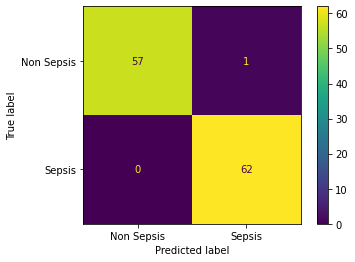

In [ ]:
# Display Confusion Matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, test_predictions, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Non Sepsis', 'Sepsis'])
disp.plot()

In [ ]:
# Get TNs, FPs, FNs, TPs

tn, fp, fn, tp = cm.ravel()

s = """
True Negatives: {0}
False Positives: {1}
False Negatives: {2}
True Positives: {3}
""".format(tn, fp, fn, tp)

print(s)


True Negatives: 57
False Positives: 1
False Negatives: 0
True Positives: 62



**Accuracy**

In [ ]:
def accuracy(tn, fp, fn, tp):
  return (tp + tn) / (tp + tn + fp + fn)

"Accuracy: {0}".format(accuracy(tn, fp, fn, tp))

'Accuracy: 0.9916666666666667'

**Sensitivity**

In [ ]:
def tpr(tn, fp, fn, tp):
  return tp / (tp + fn)

"True Positive Rate: {0}".format(tpr(tn, fp, fn, tp))

'True Positive Rate: 1.0'

**False Negative Rate**

In [ ]:
def fnr(tn, fp, fn, tp):
  return fn / (tp + fn)

"False Negative Rate: {0}".format(fnr(tn, fp, fn, tp))

'False Negative Rate: 0.0'

**Specificity**

In [ ]:
def tnr(tn, fp, fn, tp):
  return tn / (tn + fp)

"Specificity: {0}".format(tnr(tn, fp, fn, tp))

'Specificity: 0.9827586206896551'

**False Positive Rate**

In [ ]:
def fpr(tn, fp, fn, tp):
  return fp / (tn + fp)

"False Positive Rate: {0}".format(fpr(tn, fp, fn, tp))

'False Positive Rate: 0.017241379310344827'

**Negative Predictive Value**

In [ ]:
def npv(tn, fp, fn, tp):
  return tn / (tn + fn)

"Negative Predictive Value: {0}".format(npv(tn, fp, fn, tp))

'Negative Predictive Value: 1.0'

**Precision**

In [ ]:
def ppv(tn, fp, fn, tp):
  return tp / (tp + fp)

"Positive Predictive Value: {0}".format(ppv(tn, fp, fn, tp))

'Positive Predictive Value: 0.9841269841269841'

**Balanced Accuracy**

In [ ]:
def balanced_accuracy(tn, fp, fn, tp):
  tprr = tpr(tn, fp, fn, tp)
  tnrr = tnr(tn, fp, fn, tp)
  return (tprr + tnrr) / 2

"Balanced Accuracy: {0}".format(balanced_accuracy(tn, fp, fn, tp))

'Balanced Accuracy: 0.9913793103448276'

**F1**

In [ ]:
def f1(tn, fp, fn, tp):
  p = ppv(tn, fp, fn, tp)
  r = tpr(tn, fp, fn, tp)
  
  return (2*p*r) / (p + r)

"F1 Score: {0}".format(f1(tn, fp, fn, tp))

'F1 Score: 0.9919999999999999'

In [ ]:
# Get prediction probabilities

probabilities = model.predict_proba(X_test)[:, 1]

probabilities

array([1. , 0. , 0. , 1. , 1. , 0.6, 1. , 0. , 1. , 0. , 1. , 1. , 1. ,
       0. , 0. , 1. , 1. , 1. , 1. , 1. , 1. , 0. , 0. , 0. , 0. , 0. ,
       1. , 1. , 0. , 0. , 0. , 1. , 1. , 1. , 1. , 0. , 1. , 0. , 0. ,
       0.8, 0. , 1. , 0. , 0. , 1. , 1. , 0. , 1. , 1. , 0. , 1. , 1. ,
       1. , 0. , 0. , 0. , 1. , 1. , 1. , 1. , 1. , 1. , 0.2, 0. , 0. ,
       1. , 0. , 0. , 1. , 0.4, 0.2, 1. , 0. , 0. , 0. , 0. , 0.2, 1. ,
       0. , 0. , 1. , 0. , 0. , 0. , 1. , 1. , 1. , 1. , 0. , 1. , 1. ,
       0. , 1. , 0.6, 1. , 1. , 1. , 1. , 0. , 1. , 1. , 1. , 0. , 0. ,
       1. , 0. , 1. , 0.8, 1. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ,
       1. , 0. , 0. ])

In [ ]:
# Get predictions using normal threshold of 0.5

pd.value_counts(probabilities > 0.5)

True     63
False    57
dtype: int64

In [ ]:
# Generate 2000 evenly-separated thresholds

import numpy as np

thresholds = np.linspace(0, 1, num=2000).astype(np.float16)

thresholds

array([0.000e+00, 5.002e-04, 1.000e-03, ..., 9.990e-01, 9.995e-01,
       1.000e+00], dtype=float16)

In [ ]:
# Get test predictions array for each threshold

all_predictions = np.array([(probabilities > t).astype(int) for t in thresholds])

all_predictions.shape

(2000, 120)

In [ ]:
# Show distribution depending on threshold

pd.value_counts(all_predictions[0])

1    67
0    53
dtype: int64

In [ ]:
# Get confusion matrices, true positive rates, and false positive rates for each threshold

confusion_matrices = [confusion_matrix(y_test, predictions) for predictions in all_predictions]
tn_fp_fn_tps = [cm.ravel() for cm in confusion_matrices]

tprs = [tpr(tn, fp, fn, tp) for tn, fp, fn, tp in tn_fp_fn_tps]
fprs = [fpr(tn, fp, fn, tp) for tn, fp, fn, tp in tn_fp_fn_tps]

In [ ]:
# Create Scatter Plot of ROC Curve

import plotly.express as px

px.scatter(x=fprs, y=tprs, color=thresholds, labels=dict(x='False Positive Rate', y='True Positive Rate', color='Threshold'), title='ROC Curve')

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier().fit(X_train, y_train)
test_predictions = model.predict(X_test)
test_predictions

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

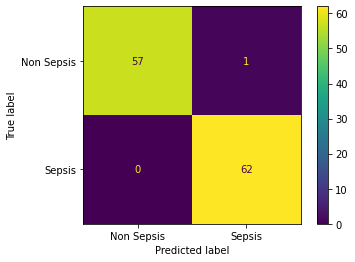

In [ ]:
cm = confusion_matrix(y_test, test_predictions, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Non Sepsis', 'Sepsis'])
disp.plot()

In [ ]:
tn, fp, fn, tp = cm.ravel()

s = """
True Negatives: {0}
False Positives: {1}
False Negatives: {2}
True Positives: {3}
""".format(tn, fp, fn, tp)

print(s)


True Negatives: 57
False Positives: 1
False Negatives: 0
True Positives: 62



**Accuracy**

In [ ]:
def accuracy(tn, fp, fn, tp):
  return (tp + tn) / (tp + tn + fp + fn)

"Accuracy: {0}".format(accuracy(tn, fp, fn, tp))

'Accuracy: 0.9916666666666667'

**Sensitivity**

In [ ]:
def tpr(tn, fp, fn, tp):
  return tp / (tp + fn)

"True Positive Rate: {0}".format(tpr(tn, fp, fn, tp))

'True Positive Rate: 1.0'

**False Negative Rate**

In [ ]:
def fnr(tn, fp, fn, tp):
  return fn / (tp + fn)

"False Negative Rate: {0}".format(fnr(tn, fp, fn, tp))

'False Negative Rate: 0.0'

**Specificity**

In [ ]:
def tnr(tn, fp, fn, tp):
  return tn / (tn + fp)

"Specificity: {0}".format(tnr(tn, fp, fn, tp))

'Specificity: 0.9827586206896551'

**False Positive Rate**

In [ ]:
def fpr(tn, fp, fn, tp):
  return fp / (tn + fp)

"False Positive Rate: {0}".format(fpr(tn, fp, fn, tp))

'False Positive Rate: 0.017241379310344827'

**Negative Predictive Value**

In [ ]:
def npv(tn, fp, fn, tp):
  return tn / (tn + fn)

"Negative Predictive Value: {0}".format(npv(tn, fp, fn, tp))

'Negative Predictive Value: 1.0'

**Precision**

In [ ]:
def ppv(tn, fp, fn, tp):
  return tp / (tp + fp)

"Positive Predictive Value: {0}".format(ppv(tn, fp, fn, tp))

'Positive Predictive Value: 0.9841269841269841'

**Balanced Accuracy**

In [ ]:
def balanced_accuracy(tn, fp, fn, tp):
  tprr = tpr(tn, fp, fn, tp)
  tnrr = tnr(tn, fp, fn, tp)
  return (tprr + tnrr) / 2

"Balanced Accuracy: {0}".format(balanced_accuracy(tn, fp, fn, tp))

'Balanced Accuracy: 0.9913793103448276'

**F1**

In [ ]:
def f1(tn, fp, fn, tp):
  p = ppv(tn, fp, fn, tp)
  r = tpr(tn, fp, fn, tp)
  
  return (2*p*r) / (p + r)

"F1 Score: {0}".format(f1(tn, fp, fn, tp))

'F1 Score: 0.9919999999999999'

**Random Forest**

In [ ]:
model = RandomForestClassifier().fit(X_train, y_train)
test_predictions = model.predict(X_test)
test_predictions

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

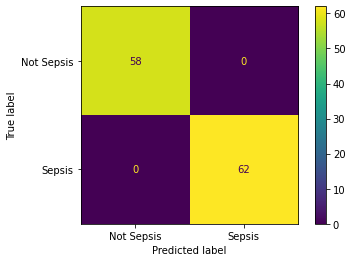

In [ ]:
cm = confusion_matrix(y_test, test_predictions, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Not Sepsis', 'Sepsis'])
disp.plot()

In [ ]:
tn, fp, fn, tp = cm.ravel()

s = """
True Negatives: {0}
False Positives: {1}
False Negatives: {2}
True Positives: {3}
""".format(tn, fp, fn, tp)

print(s)


True Negatives: 58
False Positives: 0
False Negatives: 0
True Positives: 62



**Accuracy**

In [ ]:
def accuracy(tn, fp, fn, tp):
  return (tp + tn) / (tp + tn + fp + fn)

"Accuracy: {0}".format(accuracy(tn, fp, fn, tp))

'Accuracy: 1.0'

**Sensitivity**

In [ ]:
def tpr(tn, fp, fn, tp):
  return tp / (tp + fn)

"True Positive Rate: {0}".format(tpr(tn, fp, fn, tp))

'True Positive Rate: 1.0'

**False Negative Rate**

In [ ]:
def fnr(tn, fp, fn, tp):
  return fn / (tp + fn)

"False Negative Rate: {0}".format(fnr(tn, fp, fn, tp))

'False Negative Rate: 0.0'

**Specificity**

In [ ]:
def tnr(tn, fp, fn, tp):
  return tn / (tn + fp)

"Specificity: {0}".format(tnr(tn, fp, fn, tp))

'Specificity: 1.0'

**False Positive Rate**

In [ ]:
def fpr(tn, fp, fn, tp):
  return fp / (tn + fp)

"False Positive Rate: {0}".format(fpr(tn, fp, fn, tp))

'False Positive Rate: 0.0'

**Negative Predictive Value**

In [ ]:
def npv(tn, fp, fn, tp):
  return tn / (tn + fn)

"Negative Predictive Value: {0}".format(npv(tn, fp, fn, tp))

'Negative Predictive Value: 1.0'

**Precision**

In [ ]:
def ppv(tn, fp, fn, tp):
  return tp / (tp + fp)

"Positive Predictive Value: {0}".format(ppv(tn, fp, fn, tp))

'Positive Predictive Value: 1.0'

**Balanced Accuracy**

In [ ]:
def balanced_accuracy(tn, fp, fn, tp):
  tprr = tpr(tn, fp, fn, tp)
  tnrr = tnr(tn, fp, fn, tp)
  return (tprr + tnrr) / 2

"Balanced Accuracy: {0}".format(balanced_accuracy(tn, fp, fn, tp))

'Balanced Accuracy: 1.0'

**F1**

In [ ]:
def f1(tn, fp, fn, tp):
  p = ppv(tn, fp, fn, tp)
  r = tpr(tn, fp, fn, tp)
  
  return (2*p*r) / (p + r)

"F1 Score: {0}".format(f1(tn, fp, fn, tp))

'F1 Score: 1.0'

**MLP**

In [ ]:
model = MLPClassifier().fit(X_train, y_train)
test_predictions = model.predict(X_test)
test_predictions

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

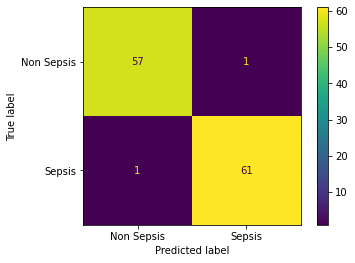

In [ ]:
cm = confusion_matrix(y_test, test_predictions, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Non Sepsis', 'Sepsis'])
disp.plot()

In [ ]:
tn, fp, fn, tp = cm.ravel()

s = """
True Negatives: {0}
False Positives: {1}
False Negatives: {2}
True Positives: {3}
""".format(tn, fp, fn, tp)

print(s)


True Negatives: 57
False Positives: 1
False Negatives: 1
True Positives: 61



**Accuracy**

In [ ]:
def accuracy(tn, fp, fn, tp):
  return (tp + tn) / (tp + tn + fp + fn)

"Accuracy: {0}".format(accuracy(tn, fp, fn, tp))

'Accuracy: 0.9833333333333333'

**Sensitivity**

In [ ]:
def tpr(tn, fp, fn, tp):
  return tp / (tp + fn)

"True Positive Rate: {0}".format(tpr(tn, fp, fn, tp))

'True Positive Rate: 0.9838709677419355'

**False Negative Rate**

In [ ]:
def fnr(tn, fp, fn, tp):
  return fn / (tp + fn)

"False Negative Rate: {0}".format(fnr(tn, fp, fn, tp))

'False Negative Rate: 0.016129032258064516'

**Specificity**

In [ ]:
def tnr(tn, fp, fn, tp):
  return tn / (tn + fp)

"Specificity: {0}".format(tnr(tn, fp, fn, tp))

'Specificity: 0.9827586206896551'

**False Positive Rate**

In [ ]:
def fpr(tn, fp, fn, tp):
  return fp / (tn + fp)

"False Positive Rate: {0}".format(fpr(tn, fp, fn, tp))

'False Positive Rate: 0.017241379310344827'

**Negative Predictive Value**

In [ ]:
def npv(tn, fp, fn, tp):
  return tn / (tn + fn)

"Negative Predictive Value: {0}".format(npv(tn, fp, fn, tp))

'Negative Predictive Value: 0.9827586206896551'

**Precision**

In [ ]:
def ppv(tn, fp, fn, tp):
  return tp / (tp + fp)

"Positive Predictive Value: {0}".format(ppv(tn, fp, fn, tp))

'Positive Predictive Value: 0.9838709677419355'

**Balanced Accuracy**

In [ ]:
def balanced_accuracy(tn, fp, fn, tp):
  tprr = tpr(tn, fp, fn, tp)
  tnrr = tnr(tn, fp, fn, tp)
  return (tprr + tnrr) / 2

"Balanced Accuracy: {0}".format(balanced_accuracy(tn, fp, fn, tp))

'Balanced Accuracy: 0.9833147942157954'

**F1**

In [ ]:
def f1(tn, fp, fn, tp):
  p = ppv(tn, fp, fn, tp)
  r = tpr(tn, fp, fn, tp)
  
  return (2*p*r) / (p + r)

"F1 Score: {0}".format(f1(tn, fp, fn, tp))

'F1 Score: 0.9838709677419355'

**Temporal Training and Testing**


In [25]:
import pandas as pd

In [ ]:
df['offset'] = df ['offset']*-1

In [26]:
print (df['offset'])

0       -660
1       -655
2       -650
3       -645
4       -640
        ... 
79795    -20
79796    -15
79797    -10
79798     -5
79799      0
Name: offset, Length: 79800, dtype: int64


In [27]:
offset = df['offset']

In [ ]:
def convert(offset):
   
    hour = offset // 60
    
    return "%d" % (hour)
     
# Driver program
n = 660
print(convert(n))

11


In [38]:
def df_to_X_y(df, window_size=12):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [40]:
WINDOW_SIZE = 12
X1, y1 = df_to_X_y(offset, WINDOW_SIZE)
X1.shape, y1.shape

((79788, 12, 1), (79788,))

In [41]:
X_train1, y_train1 = X1[:63000], y1[:63000]
X_val1, y_val1 = X1[63000:75000], y1[63000:75000]
X_test1, y_test1 = X1[75000:], y1[75000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((63000, 12, 1), (63000,), (12000, 12, 1), (12000,), (4788, 12, 1), (4788,))

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((12, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 64)                16896     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [43]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [44]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
1965/1969 [============================>.] - ETA: 0s - loss: 132251.7656 - root_mean_squared_error: 363.6644

1969/1969 [==============================] - 22s 10ms/step - loss: 132179.5625 - root_mean_squared_error: 363.5651 - val_loss: 113135.4688 - val_root_mean_squared_error: 336.3562
Epoch 2/10
1967/1969 [============================>.] - ETA: 0s - loss: 93156.2422 - root_mean_squared_error: 305.2151

1969/1969 [==============================] - 20s 10ms/step - loss: 93125.3594 - root_mean_squared_error: 305.1645 - val_loss: 72748.1641 - val_root_mean_squared_error: 269.7187
Epoch 3/10
1968/1969 [============================>.] - ETA: 0s - loss: 54692.7578 - root_mean_squared_error: 233.8648

1969/1969 [==============================] - 19s 10ms/step - loss: 54692.2031 - root_mean_squared_error: 233.8636 - val_loss: 38102.7617 - val_root_mean_squared_error: 195.1993
Epoch 4/10
1964/1969 [============================>.] - ETA: 0s - loss: 25770.2227 - root_mean_squared_error: 160.5311

1969/1969 [==============================] - 20s 10ms/step - loss: 25744.5391 - root_mean_squared_error: 160.4510 - val_loss: 15358.9590 - val_root_mean_squared_error: 123.9313
Epoch 5/10
1962/1969 [============================>.] - ETA: 0s - loss: 8979.0938 - root_mean_squared_error: 94.7581

1969/1969 [==============================] - 20s 10ms/step - loss: 8964.9434 - root_mean_squared_error: 94.6834 - val_loss: 4186.9658 - val_root_mean_squared_error: 64.7068
Epoch 6/10
1968/1969 [============================>.] - ETA: 0s - loss: 1965.7761 - root_mean_squared_error: 44.3371

1969/1969 [==============================] - 20s 10ms/step - loss: 1965.2158 - root_mean_squared_error: 44.3308 - val_loss: 586.8346 - val_root_mean_squared_error: 24.2247
Epoch 7/10
1963/1969 [============================>.] - ETA: 0s - loss: 204.0631 - root_mean_squared_error: 14.2851

1969/1969 [==============================] - 20s 10ms/step - loss: 203.6098 - root_mean_squared_error: 14.2692 - val_loss: 36.2141 - val_root_mean_squared_error: 6.0178
Epoch 8/10
1969/1969 [==============================] - ETA: 0s - loss: 21.3735 - root_mean_squared_error: 4.6231

1969/1969 [==============================] - 19s 10ms/step - loss: 21.3735 - root_mean_squared_error: 4.6231 - val_loss: 17.6317 - val_root_mean_squared_error: 4.1990
Epoch 9/10
1964/1969 [============================>.] - ETA: 0s - loss: 11.6486 - root_mean_squared_error: 3.4130

1969/1969 [==============================] - 19s 10ms/step - loss: 11.6265 - root_mean_squared_error: 3.4098 - val_loss: 2.8644 - val_root_mean_squared_error: 1.6924
Epoch 10/10
1967/1969 [============================>.] - ETA: 0s - loss: 0.9876 - root_mean_squared_error: 0.9938

1969/1969 [==============================] - 19s 10ms/step - loss: 0.9875 - root_mean_squared_error: 0.9938 - val_loss: 0.5424 - val_root_mean_squared_error: 0.7365


In [45]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [47]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

,Train Predictions,Actuals
0,-597.663269,-600
1,-595.066650,-595
2,-590.380249,-590
3,-584.609131,-585
4,-579.283081,-580
...,...,...
62995,-169.943344,-170
62996,-164.938690,-165
62997,-159.934464,-160
62998,-154.931396,-155


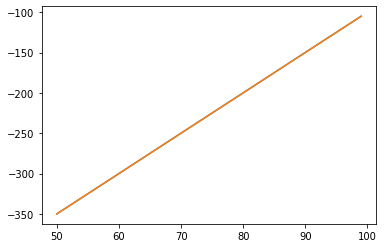

In [48]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [49]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

,Val Predictions,Actuals
0,-144.931412,-145
1,-139.935364,-140
2,-134.941971,-135
3,-129.950821,-130
4,-124.960968,-125
...,...,...
11995,-19.925104,-20
11996,-14.936136,-15
11997,-10.089911,-10
11998,-4.892161,-5


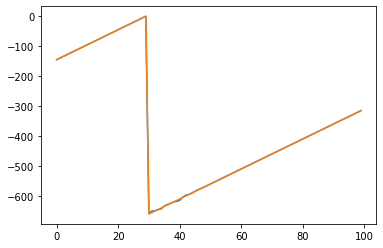

In [50]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [51]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

,Test Predictions,Actuals
0,-659.502563,-660
1,-650.375183,-655
2,-649.257446,-650
3,-645.860779,-645
4,-643.001892,-640
...,...,...
4783,-19.925104,-20
4784,-14.936136,-15
4785,-10.089911,-10
4786,-4.892161,-5


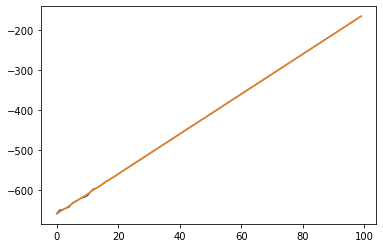

In [53]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

2

In [54]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

(      Predictions  Actuals
 0     -659.502563     -660
 1     -650.375183     -655
 2     -649.257446     -650
 3     -645.860779     -645
 4     -643.001892     -640
 ...           ...      ...
 4783   -19.925104      -20
 4784   -14.936136      -15
 4785   -10.089911      -10
 4786    -4.892161       -5
 4787     0.030525        0
 
 [4788 rows x 2 columns], 0.543747295852349)

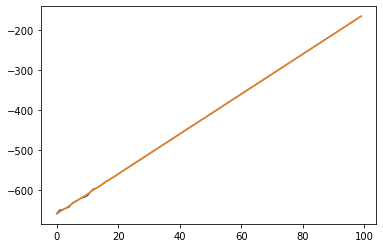

In [55]:
plot_predictions1(model1, X_test1, y_test1)

In [82]:
dataset = pd.get_dummies(df, columns = ['label'])

In [83]:
lab_df = df['label']

In [84]:
lab_df

0        1
1        1
2        1
3        1
4        1
        ..
79795    0
79796    0
79797    0
79798    0
79799    0
Name: label, Length: 79800, dtype: int64

In [85]:
lab_df = pd.DataFrame({'label':lab})
lab_df['Minutes'] = lab_df.index.map(offset)
lab_df

,label,Minutes
0,1,-660
1,1,-655
2,1,-650
3,1,-645
4,1,-640
...,...,...
79795,0,-20
79796,0,-15
79797,0,-10
79798,0,-5


In [ ]:
# lab_df['Time sin'] = np.sin(lab_df['Minutes']*(2* np.pi))
# lab_df['Time cos'] = np.cos(lab_df['Minutes']*(2* np.pi))
# lab_df

In [ ]:
# lab_df = lab_df.drop('Minutes', axis=1)
# lab_df.head()

In [86]:
def df_to_X_y2(df, window_size=12):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [87]:
X2, y2 = df_to_X_y2(lab_df)
X2.shape, y2.shape

((79788, 12, 2), (79788,))

In [88]:
X2_train, y2_train = X2[:63000], y2[:63000]
X2_val, y2_val = X2[63000:75000], y2[63000:75000]
X2_test, y2_test = X2[75000:], y2[75000:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((63000, 12, 2), (63000,), (12000, 12, 2), (12000,), (4788, 12, 2), (4788,))

In [89]:
lab_training_mean = np.mean(X2_train[:, :, 0])
lab_training_std = np.std(X2_train[:, :, 0])
                           
def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - lab_training_mean) / lab_training_std
  return X

In [90]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[  -1,  -55],
        [  -1,  -50],
        [  -1,  -45],
        ...,
        [  -1,  -10],
        [  -1,   -5],
        [  -1,    0]],

       [[  -1,  -50],
        [  -1,  -45],
        [  -1,  -40],
        ...,
        [  -1,   -5],
        [  -1,    0],
        [  -1, -660]],

       [[  -1,  -45],
        [  -1,  -40],
        [  -1,  -35],
        ...,
        [  -1,    0],
        [  -1, -660],
        [  -1, -655]],

       ...,

       [[  -1,  -70],
        [  -1,  -65],
        [  -1,  -60],
        ...,
        [  -1,  -25],
        [  -1,  -20],
        [  -1,  -15]],

       [[  -1,  -65],
        [  -1,  -60],
        [  -1,  -55],
        ...,
        [  -1,  -20],
        [  -1,  -15],
        [  -1,  -10]],

       [[  -1,  -60],
        [  -1,  -55],
        [  -1,  -50],
        ...,
        [  -1,  -15],
        [  -1,  -10],
        [  -1,   -5]]])

In [94]:
model2 = Sequential()
model2.add(InputLayer((12, 2)))
model2.add(LSTM(64))
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 64)                17152     
                                                                 
 dense_18 (Dense)            (None, 8)                 520       
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17,681
Trainable params: 17,681
Non-trainable params: 0
_________________________________________________________________


In [120]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [122]:
model2.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp2])

Epoch 1/10
1962/1969 [============================>.] - ETA: 0s - loss: 7.5648e-05 - root_mean_squared_error: 0.0087

1969/1969 [==============================] - 21s 11ms/step - loss: 7.5397e-05 - root_mean_squared_error: 0.0087 - val_loss: 1.4944e-06 - val_root_mean_squared_error: 0.0012
Epoch 2/10
1969/1969 [==============================] - ETA: 0s - loss: 3.5687e-04 - root_mean_squared_error: 0.0189

1969/1969 [==============================] - 20s 10ms/step - loss: 3.5687e-04 - root_mean_squared_error: 0.0189 - val_loss: 7.4073e-07 - val_root_mean_squared_error: 8.6066e-04
Epoch 3/10
1969/1969 [==============================] - ETA: 0s - loss: 6.1915e-05 - root_mean_squared_error: 0.0079

1969/1969 [==============================] - 21s 11ms/step - loss: 6.1915e-05 - root_mean_squared_error: 0.0079 - val_loss: 5.3936e-07 - val_root_mean_squared_error: 7.3441e-04
Epoch 4/10
1969/1969 [==============================] - 18s 9ms/step - loss: 6.5645e-05 - root_mean_squared_error: 0.0081 - val_loss: 6.0988e-07 - val_root_mean_squared_error: 7.8095e-04
Epoch 5/10
1968/1969 [============================>.] - ETA: 0s - loss: 6.5420e-05 - root_mean_squared_error: 0.0081

1969/1969 [==============================] - 23s 12ms/step - loss: 6.5396e-05 - root_mean_squared_error: 0.0081 - val_loss: 4.5453e-07 - val_root_mean_squared_error: 6.7419e-04
Epoch 6/10
1969/1969 [==============================] - 16s 8ms/step - loss: 6.5904e-04 - root_mean_squared_error: 0.0257 - val_loss: 1.4212e-06 - val_root_mean_squared_error: 0.0012
Epoch 7/10
1964/1969 [============================>.] - ETA: 0s - loss: 5.0663e-05 - root_mean_squared_error: 0.0071

1969/1969 [==============================] - 20s 10ms/step - loss: 5.0542e-05 - root_mean_squared_error: 0.0071 - val_loss: 4.0373e-07 - val_root_mean_squared_error: 6.3540e-04
Epoch 8/10
1969/1969 [==============================] - 15s 8ms/step - loss: 6.3010e-05 - root_mean_squared_error: 0.0079 - val_loss: 6.6634e-07 - val_root_mean_squared_error: 8.1630e-04
Epoch 9/10
1966/1969 [============================>.] - ETA: 0s - loss: 6.6772e-05 - root_mean_squared_error: 0.0082

1969/1969 [==============================] - 20s 10ms/step - loss: 6.6679e-05 - root_mean_squared_error: 0.0082 - val_loss: 3.2555e-07 - val_root_mean_squared_error: 5.7057e-04
Epoch 10/10
1969/1969 [==============================] - 15s 8ms/step - loss: 1.5490e-04 - root_mean_squared_error: 0.0124 - val_loss: 3.8706e-07 - val_root_mean_squared_error: 6.2214e-04


(      Predictions  Actuals
 0        0.001132        0
 1        0.002410        0
 2       -0.000294        0
 3        0.000041        0
 4        0.000812        0
 ...           ...      ...
 4783     0.001310        0
 4784     0.000889        0
 4785     0.000493        0
 4786     0.001410        0
 4787     0.000876        0
 
 [4788 rows x 2 columns], 3.8730470713768405e-07)

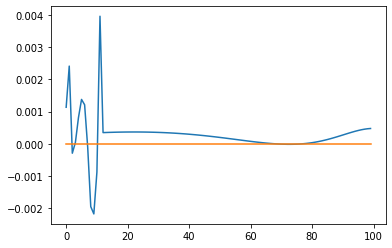

In [123]:
plot_predictions1(model2, X2_test, y2_test)

3 Hours 

In [110]:
def df_to_X_y3(df, window_size=36):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [111]:
X3, y3 = df_to_X_y3(lab_df)
X3.shape, y3.shape

((79764, 36, 2), (79764,))

In [112]:
X3_train, y3_train = X3[:63000], y3[:63000]
X3_val, y3_val = X3[63000:75000], y3[63000:75000]
X3_test, y3_test = X3[75000:], y3[75000:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((63000, 36, 2), (63000,), (12000, 36, 2), (12000,), (4764, 36, 2), (4764,))

In [113]:
lab_training_mean = np.mean(X3_train[:, :, 0])
lab_training_std = np.std(X3_train[:, :, 0])
                           
def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - lab_training_mean) / lab_training_std
  return X

In [114]:
preprocess(X3_train)
preprocess(X3_val)
preprocess(X3_test)

array([[[  -1,  -55],
        [  -1,  -50],
        [  -1,  -45],
        ...,
        [  -1, -555],
        [  -1, -550],
        [  -1, -545]],

       [[  -1,  -50],
        [  -1,  -45],
        [  -1,  -40],
        ...,
        [  -1, -550],
        [  -1, -545],
        [  -1, -540]],

       [[  -1,  -45],
        [  -1,  -40],
        [  -1,  -35],
        ...,
        [  -1, -545],
        [  -1, -540],
        [  -1, -535]],

       ...,

       [[  -1, -190],
        [  -1, -185],
        [  -1, -180],
        ...,
        [  -1,  -25],
        [  -1,  -20],
        [  -1,  -15]],

       [[  -1, -185],
        [  -1, -180],
        [  -1, -175],
        ...,
        [  -1,  -20],
        [  -1,  -15],
        [  -1,  -10]],

       [[  -1, -180],
        [  -1, -175],
        [  -1, -170],
        ...,
        [  -1,  -15],
        [  -1,  -10],
        [  -1,   -5]]])

In [115]:
model3 = Sequential()
model3.add(InputLayer((36, 2)))
model3.add(LSTM(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))

model3.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 64)                17152     
                                                                 
 dense_22 (Dense)            (None, 8)                 520       
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17,681
Trainable params: 17,681
Non-trainable params: 0
_________________________________________________________________


In [117]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [118]:
model3.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp3])

Epoch 1/10
1967/1969 [============================>.] - ETA: 0s - loss: 0.0686 - root_mean_squared_error: 0.2618

1969/1969 [==============================] - 46s 23ms/step - loss: 0.0685 - root_mean_squared_error: 0.2617 - val_loss: 6.4710e-05 - val_root_mean_squared_error: 0.0080
Epoch 2/10
1967/1969 [============================>.] - ETA: 0s - loss: 1.8768e-04 - root_mean_squared_error: 0.0137

1969/1969 [==============================] - 54s 27ms/step - loss: 1.8754e-04 - root_mean_squared_error: 0.0137 - val_loss: 1.8763e-05 - val_root_mean_squared_error: 0.0043
Epoch 3/10
1969/1969 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0511

1969/1969 [==============================] - 60s 30ms/step - loss: 0.0026 - root_mean_squared_error: 0.0511 - val_loss: 7.3709e-06 - val_root_mean_squared_error: 0.0027
Epoch 4/10
1969/1969 [==============================] - 47s 24ms/step - loss: 1.6372e-04 - root_mean_squared_error: 0.0128 - val_loss: 3.9266e-05 - val_root_mean_squared_error: 0.0063
Epoch 5/10
1967/1969 [============================>.] - ETA: 0s - loss: 1.6503e-04 - root_mean_squared_error: 0.0128

1969/1969 [==============================] - 59s 30ms/step - loss: 1.6488e-04 - root_mean_squared_error: 0.0128 - val_loss: 4.3681e-06 - val_root_mean_squared_error: 0.0021
Epoch 6/10
1969/1969 [==============================] - 48s 24ms/step - loss: 0.0034 - root_mean_squared_error: 0.0586 - val_loss: 4.1183e-05 - val_root_mean_squared_error: 0.0064
Epoch 7/10
1969/1969 [==============================] - 39s 20ms/step - loss: 1.3718e-04 - root_mean_squared_error: 0.0117 - val_loss: 1.6794e-05 - val_root_mean_squared_error: 0.0041
Epoch 8/10
1969/1969 [==============================] - 38s 19ms/step - loss: 0.0012 - root_mean_squared_error: 0.0346 - val_loss: 8.7390e-06 - val_root_mean_squared_error: 0.0030
Epoch 9/10
1969/1969 [==============================] - 38s 19ms/step - loss: 5.0553e-04 - root_mean_squared_error: 0.0225 - val_loss: 7.1235e-06 - val_root_mean_squared_error: 0.0027
Epoch 10/10
1969/1969 [==============================] - ETA: 0s - loss: 8.7811e-05 - root_mean_squ

1969/1969 [==============================] - 42s 21ms/step - loss: 8.7811e-05 - root_mean_squared_error: 0.0094 - val_loss: 2.6723e-06 - val_root_mean_squared_error: 0.0016


(      Predictions  Actuals
 0       -0.001415        0
 1       -0.001350        0
 2       -0.001235        0
 3       -0.001030        0
 4       -0.000607        0
 ...           ...      ...
 4759     0.003732        0
 4760    -0.001239        0
 4761    -0.000705        0
 4762     0.000282        0
 4763     0.000120        0
 
 [4764 rows x 2 columns], 2.676702423020388e-06)

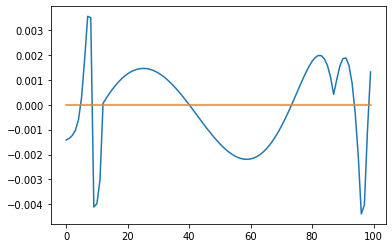

In [119]:
plot_predictions1(model3, X3_test, y3_test)

In [124]:
def df_to_X_y4(df, window_size=72):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [125]:
X4, y4 = df_to_X_y4(lab_df)
X4.shape, y4.shape

((79728, 72, 2), (79728,))

In [126]:
X4_train, y4_train = X4[:63000], y4[:63000]
X4_val, y4_val = X4[63000:75000], y4[63000:75000]
X4_test, y4_test = X4[75000:], y4[75000:]
X4_train.shape, y4_train.shape, X4_val.shape, y4_val.shape, X4_test.shape, y4_test.shape

((63000, 72, 2), (63000,), (12000, 72, 2), (12000,), (4728, 72, 2), (4728,))

In [127]:
lab_training_mean = np.mean(X4_train[:, :, 0])
lab_training_std = np.std(X4_train[:, :, 0])
                           
def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - lab_training_mean) / lab_training_std
  return X

In [128]:
preprocess(X4_train)
preprocess(X4_val)
preprocess(X4_test)

array([[[  -1,  -55],
        [  -1,  -50],
        [  -1,  -45],
        ...,
        [  -1, -375],
        [  -1, -370],
        [  -1, -365]],

       [[  -1,  -50],
        [  -1,  -45],
        [  -1,  -40],
        ...,
        [  -1, -370],
        [  -1, -365],
        [  -1, -360]],

       [[  -1,  -45],
        [  -1,  -40],
        [  -1,  -35],
        ...,
        [  -1, -365],
        [  -1, -360],
        [  -1, -355]],

       ...,

       [[  -1, -370],
        [  -1, -365],
        [  -1, -360],
        ...,
        [  -1,  -25],
        [  -1,  -20],
        [  -1,  -15]],

       [[  -1, -365],
        [  -1, -360],
        [  -1, -355],
        ...,
        [  -1,  -20],
        [  -1,  -15],
        [  -1,  -10]],

       [[  -1, -360],
        [  -1, -355],
        [  -1, -350],
        ...,
        [  -1,  -15],
        [  -1,  -10],
        [  -1,   -5]]])

In [129]:
model4 = Sequential()
model4.add(InputLayer((72, 2)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 64)                17152     
                                                                 
 dense_24 (Dense)            (None, 8)                 520       
                                                                 
 dense_25 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17,681
Trainable params: 17,681
Non-trainable params: 0
_________________________________________________________________


In [132]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [133]:
model4.fit(X4_train, y4_train, validation_data=(X4_val, y4_val), epochs=10, callbacks=[cp4])

Epoch 1/10
1968/1969 [============================>.] - ETA: 0s - loss: 0.0480 - root_mean_squared_error: 0.2191

1969/1969 [==============================] - 84s 42ms/step - loss: 0.0480 - root_mean_squared_error: 0.2190 - val_loss: 8.6136e-05 - val_root_mean_squared_error: 0.0093
Epoch 2/10
1969/1969 [==============================] - 68s 35ms/step - loss: 0.0158 - root_mean_squared_error: 0.1258 - val_loss: 0.1084 - val_root_mean_squared_error: 0.3293
Epoch 3/10
1969/1969 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.0573

1969/1969 [==============================] - 72s 37ms/step - loss: 0.0033 - root_mean_squared_error: 0.0573 - val_loss: 8.2067e-05 - val_root_mean_squared_error: 0.0091
Epoch 4/10
1969/1969 [==============================] - ETA: 0s - loss: 4.5280e-04 - root_mean_squared_error: 0.0213

1969/1969 [==============================] - 72s 37ms/step - loss: 4.5280e-04 - root_mean_squared_error: 0.0213 - val_loss: 2.1924e-05 - val_root_mean_squared_error: 0.0047
Epoch 5/10
1969/1969 [==============================] - ETA: 0s - loss: 1.3686e-04 - root_mean_squared_error: 0.0117

1969/1969 [==============================] - 72s 37ms/step - loss: 1.3686e-04 - root_mean_squared_error: 0.0117 - val_loss: 1.9108e-05 - val_root_mean_squared_error: 0.0044
Epoch 6/10
1968/1969 [============================>.] - ETA: 0s - loss: 6.7957e-04 - root_mean_squared_error: 0.0261

1969/1969 [==============================] - 72s 37ms/step - loss: 6.7932e-04 - root_mean_squared_error: 0.0261 - val_loss: 1.7309e-05 - val_root_mean_squared_error: 0.0042
Epoch 7/10
1969/1969 [==============================] - ETA: 0s - loss: 1.1261e-04 - root_mean_squared_error: 0.0106

1969/1969 [==============================] - 71s 36ms/step - loss: 1.1261e-04 - root_mean_squared_error: 0.0106 - val_loss: 9.4422e-06 - val_root_mean_squared_error: 0.0031
Epoch 8/10
1969/1969 [==============================] - 67s 34ms/step - loss: 7.2757e-04 - root_mean_squared_error: 0.0270 - val_loss: 1.1071e-05 - val_root_mean_squared_error: 0.0033
Epoch 9/10
1969/1969 [==============================] - 66s 34ms/step - loss: 6.5435e-04 - root_mean_squared_error: 0.0256 - val_loss: 1.6998e-05 - val_root_mean_squared_error: 0.0041
Epoch 10/10
1968/1969 [============================>.] - ETA: 0s - loss: 1.0008e-04 - root_mean_squared_error: 0.0100

1969/1969 [==============================] - 71s 36ms/step - loss: 1.0004e-04 - root_mean_squared_error: 0.0100 - val_loss: 6.4941e-06 - val_root_mean_squared_error: 0.0025


(      Predictions  Actuals
 0        0.002352        0
 1        0.002350        0
 2        0.002134        0
 3        0.001799        0
 4        0.001484        0
 ...           ...      ...
 4723     0.001961        0
 4724     0.000179        0
 4725     0.000917        0
 4726    -0.001154        0
 4727     0.000914        0
 
 [4728 rows x 2 columns], 6.554276886315394e-06)

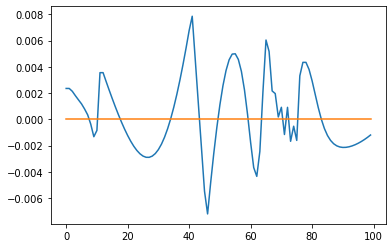

In [134]:
plot_predictions1(model4, X4_test, y4_test)